In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%html
<img src="./img/LASSO回归损失函数.png", width=400, height=200>

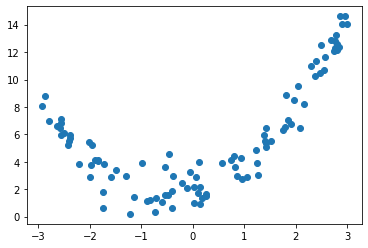

In [3]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = x**2 + x + 2  + np.random.normal(size=100)
y.shape

plt.scatter(X, y)

### 使用Lasso

In [4]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def LassoRegression(degree, alpha):
    return Pipeline([
            ('Poly', PolynomialFeatures(degree=degree)),
            ('sta_scaler', StandardScaler()),
            ('Lasso_reg', Lasso(alpha=alpha))
        ])

lasso_reg1 = LassoRegression(degree = 20, alpha=10)
lasso_reg1.fit(X, y)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=20)),
                ('sta_scaler', StandardScaler()),
                ('Lasso_reg', Lasso(alpha=10))])

In [5]:
# 绘制图像的函数
def plot_mode(model):
    plt.scatter(x, y)
    y_predict = model.predict(X)
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

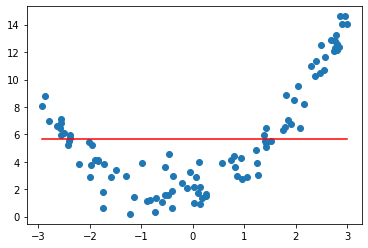

In [6]:
plot_mode(lasso_reg1)

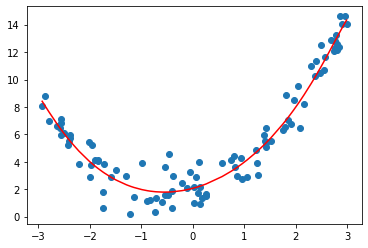

In [7]:
lasso_reg001 = LassoRegression(degree = 20, alpha=0.01)
lasso_reg001.fit(X, y)
plot_mode(lasso_reg001)

### 为什么会出现变成直线的形状

原因是当$\alpha$比较大时会使得$\theta$中很大一部分参数变为0，即比较小的值变为0<br>
所以Lasso也具有特征选择的功能